Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE



#loading the datasets
mitbih_train = pd.read_csv('E:\\Desktop\\data\\mitbih_train.csv', header=None)
mitbih_test = pd.read_csv('E:\\Desktop\\data\\mitbih_test.csv', header=None)
ptbdb_abnormal = pd.read_csv('E:\\Desktop\\data\\ptbdb_abnormal.csv', header=None)
ptbdb_normal = pd.read_csv('E:\\Desktop\\data\\ptbdb_normal.csv', header=None)



#checking their shapes
print(f'mitbih_train shape is: {mitbih_train.shape}')
print(f'mitbih_test shape is: {mitbih_test.shape}')
print(f'ptbdb_abnormal shape is: {ptbdb_abnormal.shape}')
print(f'ptbdb_normal shape is: {ptbdb_normal.shape}')



#combining the datasets
mitbih = mitbih_test.sample(frac=0.1, random_state=42)
ptbdb = pd.concat([ptbdb_normal, ptbdb_abnormal], axis=0)
print(f'mitbih shape is: {mitbih.shape}')
print(f'ptbdb shape is: {ptbdb.shape}')



#removing the label column
mitbih_labels = mitbih.iloc[:, -1]
mitbih = mitbih.iloc[:, :-1]
ptbdb_labels = ptbdb.iloc[:, -1]
ptbdb = ptbdb.iloc[:, :-1]


# Check for missing values
print(f'Missing Values in mitbih_data:{mitbih.isnull().sum()}')
print(f'Missing Values in mitbih_labels:{mitbih_labels.isnull().sum()}')
print(f'Missing Values in ptbdb_data:{ptbdb.isnull().sum()}')
print(f'Missing Values in ptbdb_labels:{ptbdb_labels.isnull().sum()}')


# Check for label imbalance
print(f'Label Distribution in mitbih:\n{mitbih_labels.value_counts()}')
print(f'Label Distribution in ptbdb:\n{ptbdb_labels.value_counts()}')


#handle class imbalance
smote = SMOTE()
mitbih_resampled, mitbih_labels_resampled = smote.fit_resample(mitbih, mitbih_labels)
ptbdb_resampled, ptbdb_labels_resampled = smote.fit_resample(ptbdb, ptbdb_labels)
print(f'Label Distribution in mitbih:\n{mitbih_labels_resampled.value_counts()}')
print(f'Label Distribution in ptbdb:\n{ptbdb_labels_resampled.value_counts()}')


#scaling the datasets
scaler = StandardScaler()
scaled_mitbih = scaler.fit_transform(mitbih_resampled)
scaled_ptbdb = scaler.fit_transform(ptbdb_resampled)

mitbih_train shape is: (87554, 188)
mitbih_test shape is: (21892, 188)
ptbdb_abnormal shape is: (10506, 188)
ptbdb_normal shape is: (4046, 188)
mitbih shape is: (2189, 188)
ptbdb shape is: (14552, 188)
Missing Values in mitbih_data:0      0
1      0
2      0
3      0
4      0
      ..
182    0
183    0
184    0
185    0
186    0
Length: 187, dtype: int64
Missing Values in mitbih_labels:0
Missing Values in ptbdb_data:0      0
1      0
2      0
3      0
4      0
      ..
182    0
183    0
184    0
185    0
186    0
Length: 187, dtype: int64
Missing Values in ptbdb_labels:0
Label Distribution in mitbih:
187
0.0    1808
4.0     159
2.0     146
1.0      60
3.0      16
Name: count, dtype: int64
Label Distribution in ptbdb:
187
1.0    10506
0.0     4046
Name: count, dtype: int64
Label Distribution in mitbih:
187
0.0    1808
2.0    1808
4.0    1808
1.0    1808
3.0    1808
Name: count, dtype: int64
Label Distribution in ptbdb:
187
0.0    10506
1.0    10506
Name: count, dtype: int64


K-means Clustering:

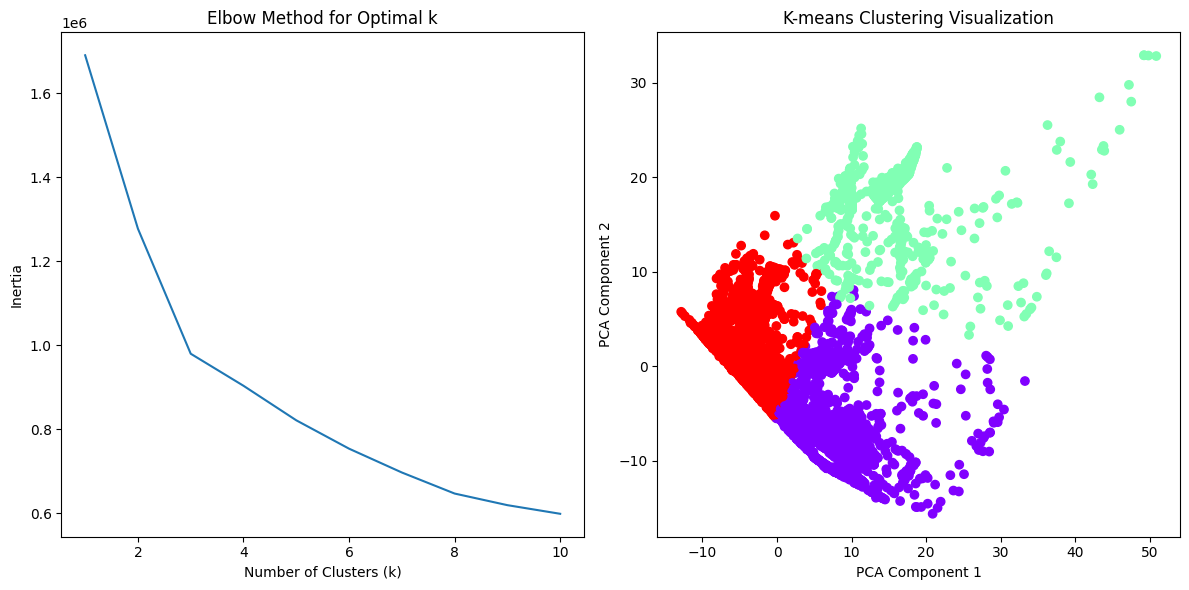

Adjusted Rand Index: 0.058144389996353865


In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score


#using elbow method to find optimal k
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_mitbih)
    inertia_values.append(kmeans.inertia_)


fig, ax = plt.subplots(1, 2, figsize=(12, 6))


ax[0].plot(range(1, 11), inertia_values)
ax[0].set_title('Elbow Method for Optimal k')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('Inertia')


#predict using the optimal k
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_mitbih)


#reduce dimensions using pca to visualize the data
pca = PCA(n_components=2)
components= pca.fit_transform(scaled_mitbih)


#visualizing the clusters
ax[1].scatter(components[:, 0], components[:, 1], c=kmeans_labels, cmap='rainbow')
ax[1].set_title('K-means Clustering Visualization')
ax[1].set_xlabel('PCA Component 1')
ax[1].set_ylabel('PCA Component 2')


plt.tight_layout()
plt.show()

#compare findings with the ground truth labels
ari_score = adjusted_rand_score(mitbih_labels_resampled, kmeans_labels)
print(f'Adjusted Rand Index: {ari_score}')

Interpreting the results:

The clusters are somewhat distinct, with overlap near the boundary. The green cluster is more spread out, while other clusters are denser.

Hierarchical Clustering:

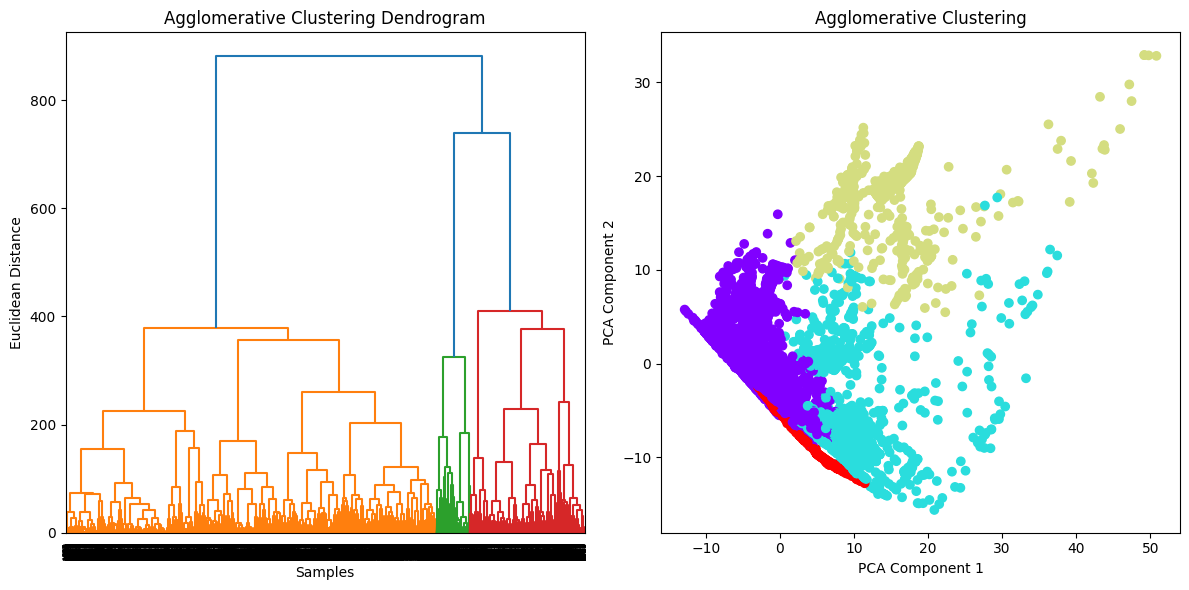

In [4]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Visualize the dendrogram
dendrogram(linkage(scaled_mitbih, method='ward'), ax=ax[0])
ax[0].set_title('Agglomerative Clustering Dendrogram')
ax[0].set_xlabel('Samples')
ax[0].set_ylabel('Euclidean Distance')


#agglomerative clustering
appropriate_k = 4
agglomerative = AgglomerativeClustering(n_clusters=appropriate_k, linkage='ward')
agg_clustering_labels = agglomerative.fit_predict(scaled_mitbih)


#visualize agglomerative clustering
ax[1].scatter(components[:, 0], components[:, 1], c=agg_clustering_labels, cmap='rainbow')
ax[1].set_title('Agglomerative Clustering')
ax[1].set_xlabel('PCA Component 1')
ax[1].set_ylabel('PCA Component 2')


plt.tight_layout()
plt.show()

Comparing the results with K-means clustering:

Agglomerative clustering shows more and distinct clusters

DBSCAN:

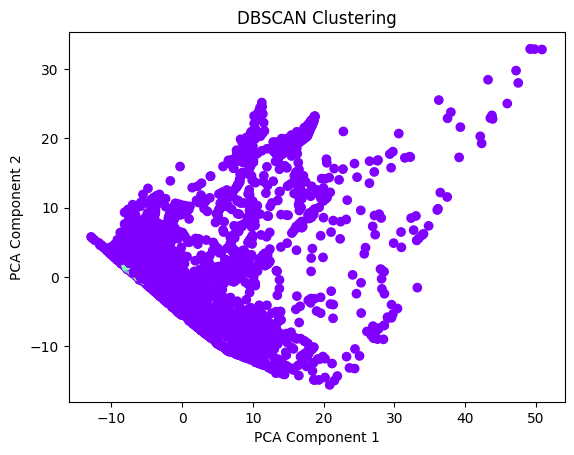

Number of clusters is: 2
Number of outliers is: 8470


In [22]:
from sklearn.cluster import DBSCAN
import numpy as np


#applied DBSCAN for different values of eps and min_samples
eps = 1.4
min_samples = 100
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(scaled_mitbih)


#visualize DBSCAN clustering
plt.figure()
plt.scatter(components[:, 0], components[:, 1], c=dbscan_labels, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


#number of clusters and outliers
unique_labels = np.unique(dbscan_labels)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
print(f'Number of clusters is: {num_clusters}')
num_outliers = np.sum(dbscan_labels == -1)
print(f'Number of outliers is: {num_outliers}')

Discussing how DBSCAN handles noise and outliers differently from K-means and hierarchical clustering:

DBSCAN handles noise explicitly by identifying sparse regions as outliers, but this aspect isn't visible in the figure.
DBSCAN is generally better for detecting non-spherical clusters, but in this figure, it appears to have merged all points into one dense cluster.

PCA for Dimensionality Reduction:

Adjusted Rand Index: 0.059320435182215296
Number of clusters is: 3
Number of outliers is: 8470


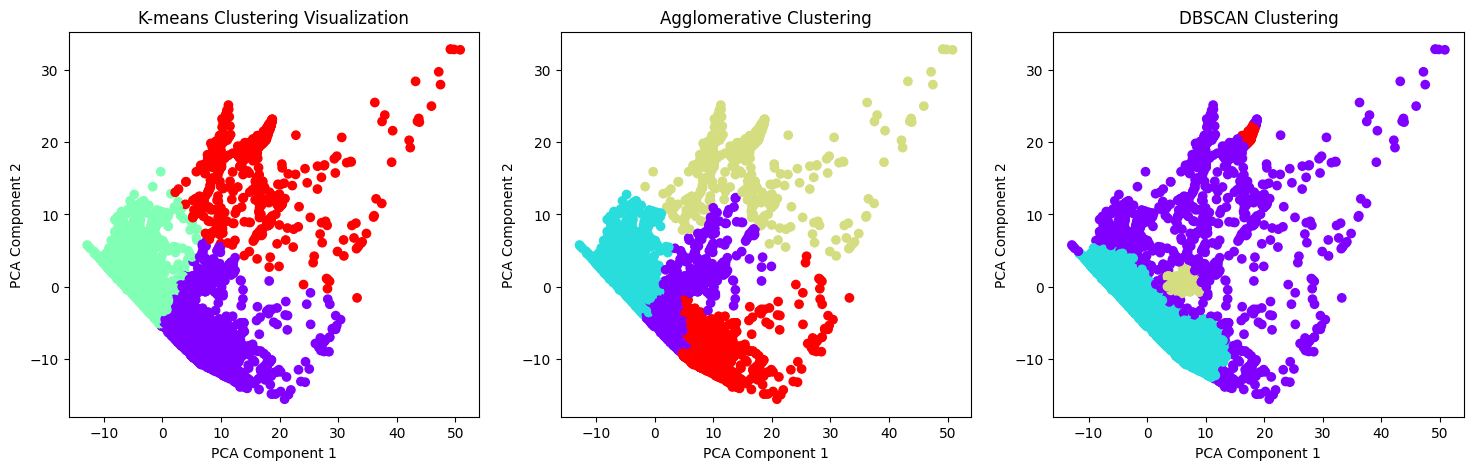

<Figure size 640x480 with 0 Axes>

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))


#kmeans with pca
kmeans_pca_labels = kmeans.fit_predict(components)


#visualizing the clusters
axes[0].scatter(components[:, 0], components[:, 1], c=kmeans_pca_labels, cmap='rainbow')
axes[0].set_title('K-means Clustering Visualization')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')


#compare findings with the ground truth labels
ari_score = adjusted_rand_score(mitbih_labels_resampled, kmeans_pca_labels)
print(f'Adjusted Rand Index: {ari_score}')

#hierarchical with pca
hierarchical_pca_labels = agglomerative.fit_predict(components)

#visualize agglomerative clustering
axes[1].scatter(components[:, 0], components[:, 1], c=hierarchical_pca_labels, cmap='rainbow')
axes[1].set_title('Agglomerative Clustering')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')

#dbscan with pca
dbscan_pca_labels = dbscan.fit_predict(components)


#visualize DBSCAN clustering
axes[2].scatter(components[:, 0], components[:, 1], c=dbscan_pca_labels, cmap='rainbow')
axes[2].set_title('DBSCAN Clustering')
axes[2].set_xlabel('PCA Component 1')
axes[2].set_ylabel('PCA Component 2')


#number of clusters and outliers
unique_labels = np.unique(dbscan_pca_labels)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
print(f'Number of clusters is: {num_clusters}')
num_outliers = np.sum(dbscan_labels == -1)
print(f'Number of outliers is: {num_outliers}')


plt.show()
plt.tight_layout()

Comparing the clustering results with and without PCA:

K-means:

The Adjusted Rand Index (ARI) slightly improved from 0.0581 to 0.0593, indicating minimal change in clustering accuracy.

DBSCAN:

The number of clusters increased from 2 to 3, suggesting PCA helped the algorithm find more structure in the data. However, the number of outliers remained the same , showing that PCA didn’t significantly reduce outliers or improve the clustering results.


Hierarchical:
After applying PCA, hierarchical clustering produced more distinct clusters. This result suggests that PCA helped the algorithm find more structure in the data.

Cluster Evaluation and Comparison:

In [24]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np


#kmeans
kmeans_silhouette = silhouette_score(components, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(components, kmeans_labels)
kmeans_wcss = np.sum(np.min(kmeans.transform(components), axis=1) ** 2)

print("K-Means:")
print(f"Silhouette Score: {kmeans_silhouette}")
print(f"Davies-Bouldin Score: {kmeans_davies_bouldin}")
print(f"WCSS: {kmeans_wcss}")

#hierarchical
hierarchical_silhouette = silhouette_score(components, agg_clustering_labels)
hierarchical_davies_bouldin = davies_bouldin_score(components, agg_clustering_labels)

print("\nHierarchical Clustering:")
print(f"Silhouette Score: {hierarchical_silhouette}")
print(f"Davies-Bouldin Score: {hierarchical_davies_bouldin}")
print("WCSS: Not applicable for hierarchical clustering!")


#DBSCAN
dbscan_silhouette = silhouette_score(components, dbscan_labels)
dbscan_davies_bouldin = davies_bouldin_score(components, dbscan_labels)

print("\nDBSCAN:")
print(f"Silhouette Score: {dbscan_silhouette}")
print(f"Davies-Bouldin Score: {dbscan_davies_bouldin}")
print("WCSS: Not applicable for DBSCAN")

K-Means:
Silhouette Score: 0.6000696846225998
Davies-Bouldin Score: 0.5650640204621368
WCSS: 229355.12701318692

Hierarchical Clustering:
Silhouette Score: 0.40002964533671065
Davies-Bouldin Score: 0.982281241633528
WCSS: Not applicable for hierarchical clustering!

DBSCAN:
Silhouette Score: -0.31886693156541523
Davies-Bouldin Score: 1.2620419368252735
WCSS: Not applicable for DBSCAN


Discussing which algorithm performed best on this dataset and why:

K-Means had a moderate silhouette score (0.600) and a relatively low Davies-Bouldin score (0.829), indicating reasonably well-separated clusters. However, its WCSS was relatively high, suggesting some dispersion within clusters.K-Means performed better on the dataset because it is effective at identifying well-separated, spherical clusters, which aligns with the dataset's structure.

Hierarchical Clustering produced slightly worse results with a lower silhouette score (0.400) and a higher Davies-Bouldin score (0.982), indicating more overlapping clusters.

DBSCAN performed the worst, with a negative silhouette score (-0.318) and a high Davies-Bouldin score (1.262), indicating poor clustering quality and significant overlap.